In [14]:
#Used for data manipulation
import numpy as np
import xarray as xr
from scipy import stats 
import pandas as pd
import math as mt
#Others
import time
#Data visualization
import datetime
from dateutil.rrule import rrule, DAILY, HOURLY
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
from xhistogram.xarray import histogram


In [2]:
#Time to get the data from AWS; download locally***
file = 'gdp_v2.00.nc'
#url_path = 'https://noaa-oar-hourly-gdp-pds.s3.amazonaws.com/latest/'
#ds = xr.open_dataset(url_path+file+'#mode=bytes')
url_path = '/Users/19082/Desktop/Drifter/'
ds = xr.open_dataset(url_path+file)

c:\Users\19082\miniconda3\lib\site-packages\xarray\backends\plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [3]:
ds

<xarray.Dataset>
Dimensions:                (traj: 17324, obs: 165754333)
Coordinates:
    ID                     (traj) int64 ...
    longitude              (obs) float32 ...
    latitude               (obs) float32 ...
    time                   (obs) datetime64[ns] ...
    ids                    (obs) int64 ...
Dimensions without coordinates: traj, obs
Data variables: (12/53)
    rowsize                (traj) int64 ...
    location_type          (traj) bool ...
    WMO                    (traj) int32 ...
    expno                  (traj) int32 ...
    deploy_date            (traj) datetime64[ns] ...
    deploy_lon             (traj) float32 ...
    ...                     ...
    err_sst                (obs) float32 ...
    err_sst1               (obs) float32 ...
    err_sst2               (obs) float32 ...
    flg_sst                (obs) int8 ...
    flg_sst1               (obs) int8 ...
    flg_sst2               (obs) int8 ...
Attributes: (12/15)
    title:             Global Drifter Program hourly drifting buoy collection
    history:           Version 2.00.  Metadata from dirall.dat and deplog.dat
    Conventions:       CF-1.6
    date_created:      2022-01-14T11:16:01.998226
    publisher_name:    GDP Drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    ...                ...
    metadata_link:     https://www.aoml.noaa.gov/phod/dac/dirall.html
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    institution:       NOAA Atlantic Oceanographic and Meteorological Laboratory
    acknowledgement:   Elipot et al. (2022) to be submitted. Elipot et al. (2...
    summary:           Global Drifter Program hourly data

Obtain and plot SST Data:

In [3]:
bin1 = '2000-09-03'
bin2 = '2000-10-03'

In [4]:

data_subset_sst = ds[['time']].where((ds.time > np.datetime64(bin1)) & 
                                                   (ds.time < np.datetime64(bin2)) & 
                                                   (ds.flg_sst ==5), drop=True)

In [8]:
sst11 = histogram(data_subset_sst['time'], bins = pd.date_range(bin1, bin2, freq= "10D"))

ValueError: The number of bin definitions doesn't match the number of args

(array([22489., 23602., 23998., 24875., 24637., 24214., 24304., 24001.,
        24060., 23778., 25439., 25221., 26585., 28922., 28875., 25852.,
        25399., 27761.]),
 array([11203., 11213., 11223., 11233., 11243., 11253., 11263., 11273.,
        11283., 11293., 11303., 11313., 11323., 11333., 11343., 11353.,
        11363., 11373., 11383.]),
 <BarContainer object of 18 artists>)

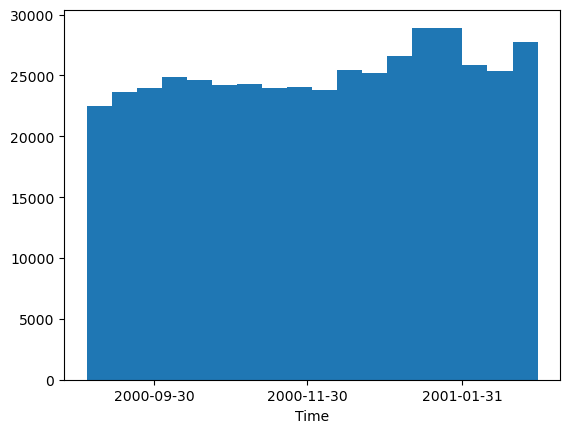

In [7]:

xticks = pd.date_range(bin1, bin2, freq= "2M") 
bins = pd.date_range(bin1, bin2, freq= "10D")  # 2 year bins
data_subset_sst['time'].plot.hist(xticks = xticks, bins = bins)

Obtain and plot sst2 data:

In [5]:
data_subset_sst2 = ds[['time']].where((ds.time > np.datetime64(bin1)) & 
                                      (ds.time < np.datetime64(bin2)) & 
                                      (ds.flg_sst2 ==5), drop=True)

(array([ 9383., 10108., 10263.,  9944., 10177., 10235., 10946., 10620.,
        10925., 10552., 11861., 11630., 12203., 13613., 13803., 12209.,
        12444., 14257.]),
 array([11203., 11213., 11223., 11233., 11243., 11253., 11263., 11273.,
        11283., 11293., 11303., 11313., 11323., 11333., 11343., 11353.,
        11363., 11373., 11383.]),
 <BarContainer object of 18 artists>)

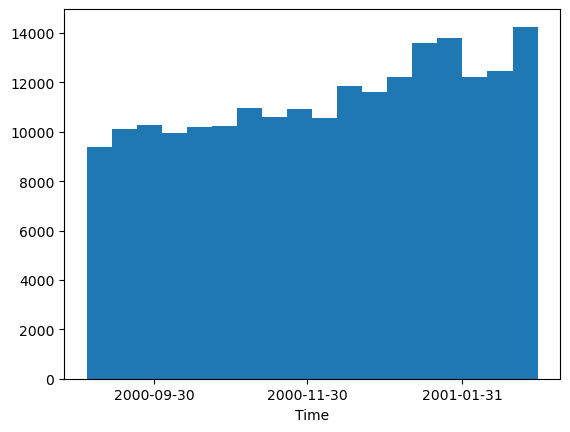

In [11]:
xticks = pd.date_range(bin1, bin2, freq= "2M") 
bins = pd.date_range(bin1, bin2, freq= "10D")  # 10 day bins
data_subset_sst2['time'].plot.hist(xticks = xticks, bins = bins)

Obtain and plot pos+velo data:

In [6]:
data_subset_vn = ds[['time']].where((ds.time > np.datetime64(bin1)) & 
                                            (ds.time < np.datetime64(bin2)) &
                                            (ds.vn.isnull() == False), drop=True)

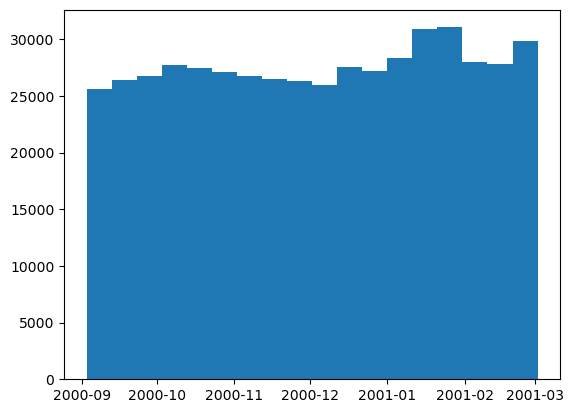

In [88]:
xticks = pd.date_range(bin1, bin2, freq= "2M") #
bins = pd.date_range(bin1, bin2, freq= "10D")  # 10 day bins
n, bins3, patches = plt.hist(data_subset_vn['time'], bins = bins)



(array([25585., 26444., 26797., 27722., 27481., 27100., 26770., 26478.,
        26320., 25980., 27556., 27220., 28306., 30913., 31053., 27969.,
        27777., 29870.]),
 array([11203., 11213., 11223., 11233., 11243., 11253., 11263., 11273.,
        11283., 11293., 11303., 11313., 11323., 11333., 11343., 11353.,
        11363., 11373., 11383.]),
 <BarContainer object of 18 artists>)

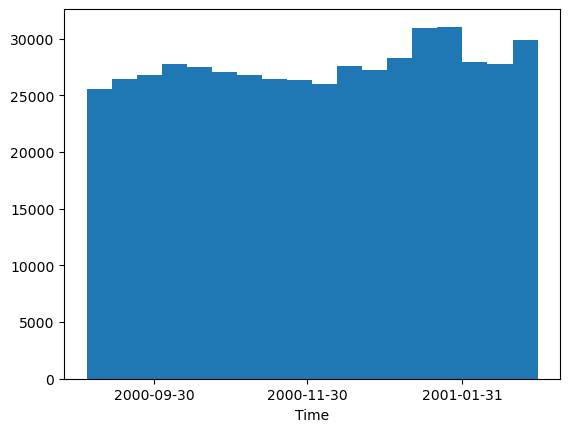

In [56]:
xticks = pd.date_range(bin1, bin2, freq= "2M") #
bins = pd.date_range(bin1, bin2, freq= "10D")  # 10 day bins
dvn = data_subset_vn['time'].plot.hist(xticks = xticks, bins = bins, label = "Position and Velocity")
dvn



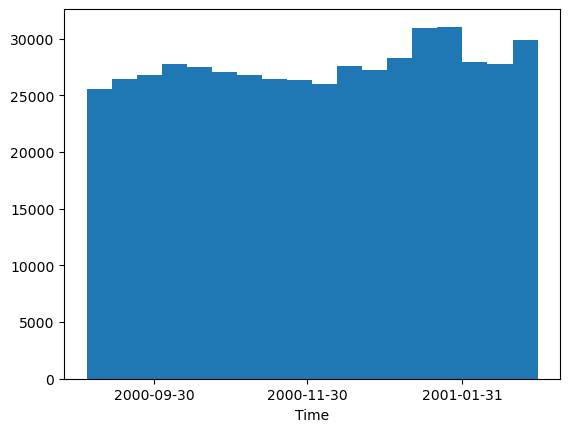

In [80]:
xticks = pd.date_range(bin1, bin2, freq= "2M") #
bins = pd.date_range(bin1, bin2, freq= "10D")  # 10 day bins
dvn = data_subset_vn['time'].plot.hist(xticks = xticks, bins = bins, label = "Position and Velocity")



Text(0.5, 0, '')

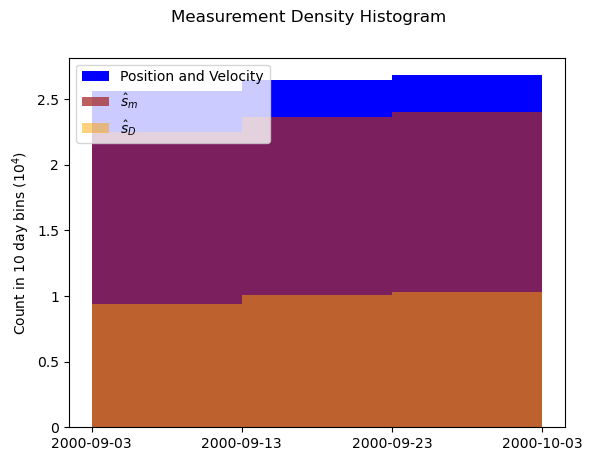

In [30]:
xticks = pd.date_range(bin1, bin2, freq= "10D") # xticks
fig = plt.figure()
ax = fig.add_subplot()
bins = pd.date_range(bin1, bin2, freq= "10D")  # 10 day bins
n, bins, patches = data_subset_vn['time'].plot.hist(xticks = xticks, bins = bins, label = "Position and Velocity", color = "blue")
n1, bins1, patches1 = data_subset_sst['time'].plot.hist(xticks = xticks, bins = bins, label = "$\hat{s}$$_{m}$", color = "brown", alpha = 0.75)
n2, bins2, batches2 = data_subset_sst2['time'].plot.hist(xticks = xticks, bins = bins, label = "$\hat{s}$$_{D}$", color = "orange", alpha = 0.5)
scale_y = 1e4
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y)) # scale y-axis
ax.yaxis.set_major_formatter(ticks_y)
plt.suptitle("Measurement Density Histogram")
plt.legend(loc='upper left')
ax.set_ylabel("Count in 10 day bins (10$^4$)")
ax.set_xlabel("")

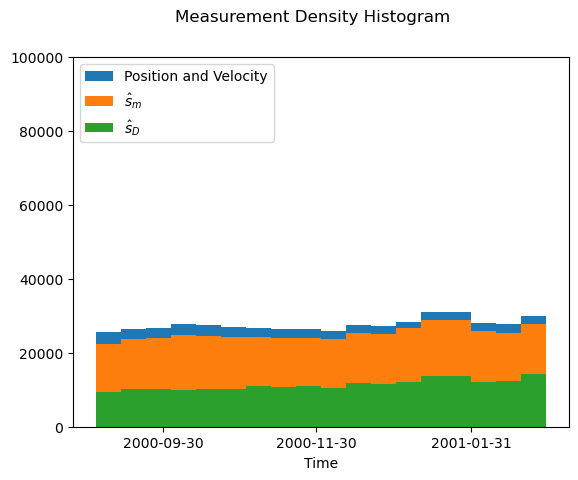

In [15]:
xticks = pd.date_range(bin1, bin2, freq= "2M") #
bins = pd.date_range(bin1, bin2, freq= "10D")  # 10 day bins
n, bins, patches = data_subset_vn['time'].plot.hist(xticks = xticks, bins = bins, label = "Position and Velocity")
n1, bins1, patches1 = data_subset_sst['time'].plot.hist(xticks = xticks, bins = bins, label = "$\hat{s}$$_{m}$")
n2, bins2, batches2 = data_subset_sst2['time'].plot.hist(xticks = xticks, bins = bins, label = "$\hat{s}$$_{D}$")
plt.suptitle("Measurement Density Histogram")
plt.legend(loc='upper left')

In [61]:
datavn = ds.vn
np.histogram(ds.vn.values)
a = np.histogram(ds.vn, 100, (-1, 1))

KeyboardInterrupt: 

Loops (Not using these):

In [41]:
bin1 = datetime.datetime(2000, 10, 3, hour = 1)
bin2 = datetime.datetime(2000, 10, 3, hour = 3)
ssthist = {}
sst2hist = {}
posvelohist = {}
i = bin1
a = rrule(HOURLY, dtstart = bin1, until = bin2)
for ds['time'] in a:
    #if ds.time(ds.flg_sst==5):
    try:
        ds.time.where(ds.flg_sst==5)  # all we care about is if the flag is 5; if there is no measurement, flag wont be 5
        ssthist[i] = ssthist.get(i, 0) + 1  #trying to get ssthist[date:hour] = x for 10 days
    except IndexError:
        pass
    i = i + datetime.timedelta(hours = 1)

In [50]:
bin1 = datetime.datetime(2000, 10, 3, hour = 1)
bin2 = datetime.datetime(2000, 10, 3, hour = 3)
ssthist = {}
sst2hist = {}
posvelohist = {}
i = bin1
a = rrule(HOURLY, dtstart = bin1, until = bin2)
for ds['time'] in a:
    if(ds.time.where(ds.flg_sst==5).all):
        ssthist[i] = ssthist.get(i, 0) + 1  #trying to get ssthist[date:hour] = x for 10 days
    i = i + datetime.timedelta(hours = 1)

In [51]:
ssthist

{datetime.datetime(2000, 10, 3, 1, 0): 1,
 datetime.datetime(2000, 10, 3, 2, 0): 1,
 datetime.datetime(2000, 10, 3, 3, 0): 1}

In [26]:
bin1 = datetime.datetime(2000, 10, 3, hour = 1)
bin2 = datetime.datetime(2000, 10, 6, hour = 1)
ssthist = {}
sst2hist = {}
posvelohist = {}
i = bin1
for ds['time'] in rrule(HOURLY, dtstart = bin1, until = bin2):  # i gets assigned as the current date?
    try:
        ds.time.where(ds.flg_sst==5)  # all we care about is if the flag is 5; if there is no measurement, flag wont be 5
        ssthist[i] = ssthist.get(i, 0) + 1  #trying to get ssthist[date:hour] = x for 10 days
    except IndexError:
        pass
    i = i + datetime.timedelta(hours = 1)

In [37]:
bin1 = datetime.datetime(2000, 10, 3, hour = 1)
bin2 = datetime.datetime(2000, 10, 3, hour = 6)
i = bin1
a = ds.time.where(ds.flg_sst==5)
for a in rrule(HOURLY, dtstart = bin1, until = bin2):  
        ssthist[i] = ssthist.get(i, 0) + 1  #trying to get ssthist[date:hour] = x for 10 days
        i = i + datetime.timedelta(hours = 1)


In [ ]:
timebin = pd.date_range(start='1987-10-03T13:00:00.000000000', end='2020-06-30T23:00:00.000000000', freq='10D')
bin1 = datetime.date(1987, 10, 3)
bin2 = datetime.date(1987, 10, 4)
ssthist = {}
sst2hist = {}
posvelohist = {}
for ds['time'] in rrule(HOURLY, dtstart = bin1, until = bin2):
    try:
        ds.sst.where(ds.flg_sst==5)  # all we care about is if the flag is 5; if there is no measurement, flag wont be 5
        ssthist[bin1] = ssthist.get(bin1, 0) + 1  #trying to get ssthist[date] = ... 
    except IndexError:
        pass
    try:
        ds.sst2.where(ds.flg_sst2==5)
        sst2hist[bin1] = sst2hist.get(bin1, 0) + 1
    except IndexError:
        pass
    try:
        ds.longitude
        posvelohist[bin1] = posvelohist.get(bin1, 0) + 1
    except IndexError:
        pass
    